American Airlines Group Inc. (AAL)

Sumber: yfinance dengan ticker ALL

Periode data: 1 Januari 2019 – 31 Maret 2025

In [1]:
import yfinance as yf
import pandas as pd

# Tentukan kode saham untuk IHSG
kode_saham = "AAL"

# Tentukan rentang waktu
start_date = "2019-01-01"
end_date = "2025-03-31"

# Ambil data menggunakan yfinance
df = yf.download(kode_saham, start=start_date, end=end_date)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAL,AAL,AAL,AAL,AAL
Date,,,,,
2019-01-02,31.963156,32.130453,30.555911,30.959386,5229500
2019-01-03,29.581665,31.343182,28.351556,31.185728,16822000
2019-01-04,31.530161,31.579365,29.916256,29.955621,9369600
2019-01-07,32.425678,32.947243,30.742888,31.480953,8010700
2019-01-08,31.904110,33.114541,31.687613,32.829154,7107700


In [2]:
# df.to_excel('IHSG.xlsx')

In [3]:
# Import data
import pandas as pd

# df = pd.read_excel('/content/IHSG.xlsx')
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-02,31.963156,32.130453,30.555911,30.959386,5229500
1,2019-01-03,29.581665,31.343182,28.351556,31.185728,16822000
2,2019-01-04,31.530161,31.579365,29.916256,29.955621,9369600
3,2019-01-07,32.425678,32.947243,30.742888,31.480953,8010700
4,2019-01-08,31.904110,33.114541,31.687613,32.829154,7107700


In [4]:
# Mengambil kolom Date dan Close
data = df[['Date', 'Close']]
data.tail()

,Date,Close
1564,2025-03-24,11.83
1565,2025-03-25,11.51
1566,2025-03-26,11.44
1567,2025-03-27,11.14
1568,2025-03-28,10.70


In [5]:
# data = data[data['Date'] >= '2020-01-01'].reset_index(drop=True)
# data.head()

In [6]:
# Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1569 non-null   datetime64[ns]
 1   Close   1569 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.6 KB


In [7]:
# Melihat data yang kosong
data.isna().sum()

,0
Date,0
Close,0


In [8]:
# Melihat deskripsi data
data.describe()

,Date,Close
count,1569,1569.000000
mean,2022-02-11 19:34:45.659655680,18.084373
min,2019-01-02 00:00:00,9.040000
25%,2020-07-23 00:00:00,13.330000
50%,2022-02-10 00:00:00,15.880000
75%,2023-09-05 00:00:00,21.080000
max,2025-03-28 00:00:00,36.441425
std,NaN,6.650804


In [9]:
# Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, Input

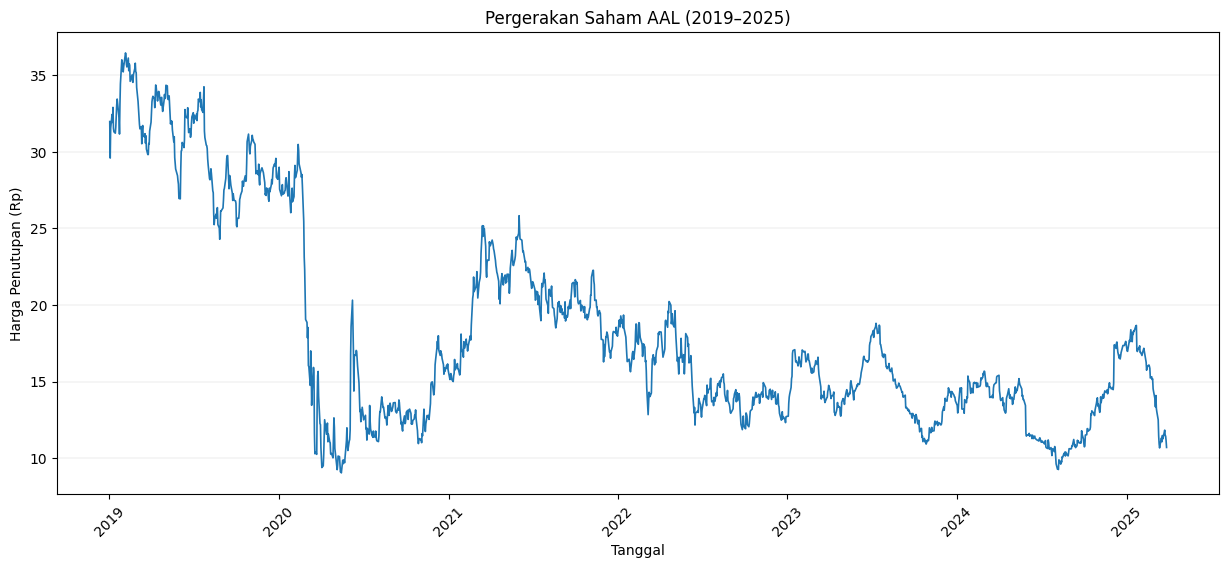

In [10]:
# Visualisasi data
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(15,6))
plt.title('Pergerakan Saham AAL (2019–2025)')
plt.plot(df['Date'], df['Close'], linewidth=1.2)
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Rp)')
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [11]:
# Melakukan normalisasi data
sc = MinMaxScaler(feature_range=(0, 1))
data_sc = sc.fit_transform(data[['Close']].values)
data_sc

array([[0.83656801],
       [0.74965681],
       [0.8207661 ],
       ...,
       [0.08758667],
       [0.07663836],
       [0.06058078]])

In [12]:
# norm = pd.DataFrame(data_sc)
# norm.head()

In [13]:
# norm.to_excel('Hasil_Normalisasi.xlsx')

In [14]:
# Pembagian data (80% training, 10% testing, 10% validasi)
train_len = int(len(data_sc) * 0.8)
test_len = int(len(data_sc) * 0.10)
val_len = len(data_sc) - train_len - test_len

In [15]:
# Menampilkan jumlah data
print(f'Jumlah data keseluruhan: {len(data_sc)}')
print(f'Jumlah data training: {train_len}')
print(f'Jumlah data validasi: {val_len}')
print(f'Jumlah data testing:{test_len}')

Jumlah data keseluruhan: 1569
Jumlah data training: 1255
Jumlah data validasi: 158
Jumlah data testing:156


In [46]:
# Membuat Windowing pada data Training
train_data = data_sc[0:train_len  , : ]
x_train=[]
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [47]:
# Mengubah tipe data list menjadi NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [48]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [49]:
# Membuat Windowing pada data Validation
val_data = data_sc[train_len - 30:(train_len + val_len) , : ]
x_val = []
y_val = []
for i in range(30,len(val_data)):
    x_val.append(val_data[i-30:i,0])
    y_val.append(val_data[i,0])

In [50]:
# Mengubah tipe data list menjadi NumPy array
x_val, y_val = np.array(x_val), np.array(y_val)

In [51]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))

In [52]:
# Membangun model LSTM
import tensorflow as tf
from keras.layers import LSTM, Dropout, Dense, Input
from keras.models import Sequential

model_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])



In [53]:
# Mendefinisikan fungsi Callback untuk model LSTM
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping_lstm = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint khusus untuk model LSTM
checkpoint_path_lstm = 'model_checkpoints/weights_lstm_model.weights.h5'
checkpoint_dir_lstm = os.path.dirname(checkpoint_path_lstm)
checkpoint_lstm = ModelCheckpoint(
    filepath=checkpoint_path_lstm,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [54]:
# Konfigurasi optimizer dan loss function untuk LSTM
optimizer_lstm = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile model LSTM
model_lstm.compile(optimizer=optimizer_lstm, loss='mean_squared_error')

In [56]:
# Melakukan training pada model LSTM
history_lstm = model_lstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_lstm, early_stopping_lstm]
)

Epoch 1/100
153/154 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0460
Epoch 1: val_loss improved from inf to 0.00109, saving model to model_checkpoints/weights_lstm_model.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0457 - val_loss: 0.0011
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0061
Epoch 2: val_loss did not improve from 0.00109
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0061 - val_loss: 0.0018
Epoch 3/100
153/154 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0061
Epoch 3: val_loss improved from 0.00109 to 0.00084, saving model to model_checkpoints/weights_lstm_model.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0061 - val_loss: 8.4110e-04
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0041
Epoch 4: val_loss improved from 0.00084 to 0.00082, saving model to model_checkpoints/weights_lstm_model.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0041 - val_loss: 8.1853e-04
Epoch 5/100
154/154 

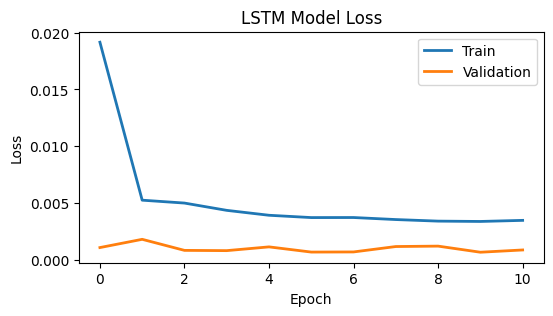

In [57]:
# Menampilkan plot nilai loss untuk model LSTM
plt.figure(figsize=(6,3))
plt.plot(history_lstm.history['loss'], linewidth=2)
plt.plot(history_lstm.history['val_loss'], linewidth=2)
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [59]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])
# Mengonversi x_test menjadi array numpy
x_test = np.array(x_test)
# Melakukan reshape untuk menambah dimensi fitur (1 fitur)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [60]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [61]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [63]:
# Load bobot model terbaik
model_lstm.load_weights("/content/model_checkpoints/weights_lstm_model.weights.h5")

In [66]:
# Melakukan prediksi
y_pred_lstm = model_lstm.predict(x_test)
y_pred_lstm = np.ceil(sc.inverse_transform(y_pred_lstm))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


In [67]:
# Evaluasi menggunakan metrik MSE, RMSE, dan MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_lstm = round(mean_squared_error(y_test, y_pred_lstm), 2)
rmse_lstm = round(np.sqrt(mean_squared_error(y_test, y_pred_lstm)), 2)
mae_lstm = round(mean_absolute_error(y_test, y_pred_lstm), 2)

print("Evaluasi Model LSTM")
print(f'MSE  : {mse_lstm}')
print(f'RMSE : {rmse_lstm}')
print(f'MAE  : {mae_lstm}')

Evaluasi Model LSTM
MSE  : 0.95
RMSE : 0.97
MAE  : 0.74


In [68]:
# DataFrame hasil prediksi LSTM
data_pred_lstm = data[-test_len:].copy()
data_pred_lstm['Prediction'] = y_pred_lstm
data_pred_lstm

,Date,Close,Prediction
1413,2024-08-14,9.74,10.0
1414,2024-08-15,10.09,10.0
1415,2024-08-16,10.05,10.0
1416,2024-08-19,10.31,10.0
1417,2024-08-20,10.29,11.0
...,...,...,...
1564,2025-03-24,11.83,12.0
1565,2025-03-25,11.51,12.0
1566,2025-03-26,11.44,12.0
1567,2025-03-27,11.14,12.0


Kalimat

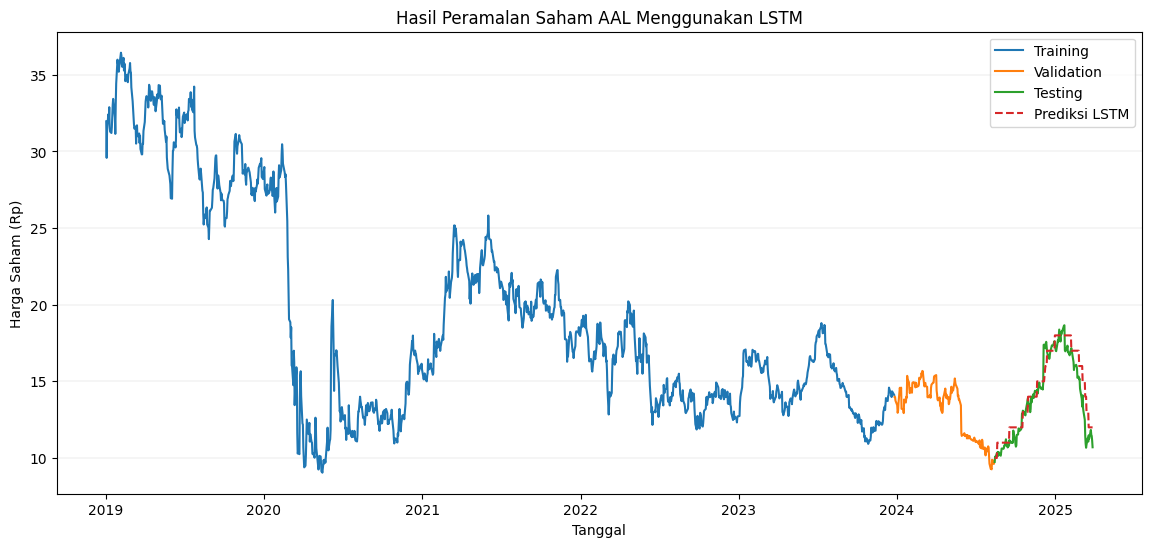

In [69]:
# Visualisasi Hasil Prediksi Saham BBCA.JK dengan LSTM
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham AAL Menggunakan LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Close'], label='Testing')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Prediction'], label='Prediksi LSTM', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

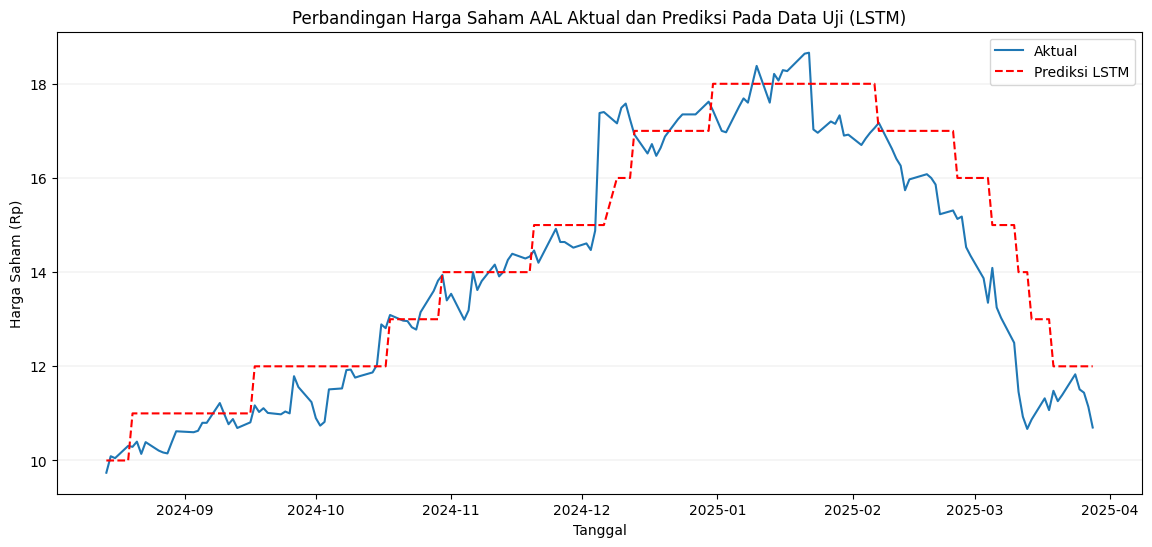

In [71]:
# Visualisasi Prediksi Data Uji Saham BBCA.JK dengan LSTM
plt.figure(figsize=(14,6))
plt.title('Perbandingan Harga Saham AAL Aktual dan Prediksi Pada Data Uji (LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Close'], label='Aktual')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Prediction'],
label='Prediksi LSTM', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [72]:
#Prediksi 30 hari ke depan dengan LSTM
from datetime import timedelta

# Ambil data terakhir sebagai input prediksi awal
last_input = x_test[-1]  # ambil data terakhir dari test set
future_input = last_input.reshape(1, last_input.shape[0], last_input.shape[1])

# Prediksi 30 hari ke depan dengan model LSTM
future_preds = []
for _ in range(30):
    next_pred = model_lstm.predict(future_input)
    future_preds.append(next_pred[0])
    # Update input untuk prediksi berikutnya
    future_input = np.append(future_input[:, 1:, :], [[next_pred[0]]], axis=1)

# Invers transform hasil prediksi ke skala asli
future_preds_inv = sc.inverse_transform(np.array(future_preds))

# Buat tanggal 30 hari ke depan (weekday saja)
last_date = pd.to_datetime(data['Date'].iloc[-1])
future_dates = []
curr_date = last_date + timedelta(days=1)

while len(future_dates) < 30:
    if curr_date.weekday() < 5:
        future_dates.append(curr_date)
    curr_date += timedelta(days=1)

# Buat DataFrame hasil prediksi LSTM
pred_30_lstm = pd.DataFrame({
    'Date': future_dates,
    'Prediction': np.ceil(future_preds_inv.flatten())
})

# Tampilkan hasil
pred_30_lstm.head()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━

,Date,Prediction
0,2025-03-31,12.0
1,2025-04-01,12.0
2,2025-04-02,12.0
3,2025-04-03,12.0
4,2025-04-04,12.0


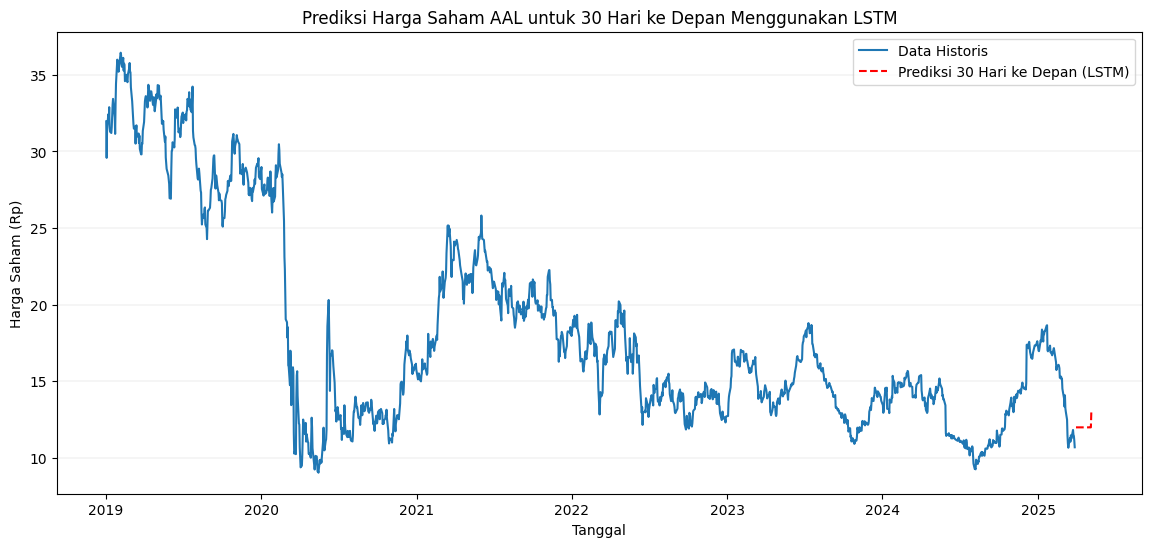

In [73]:
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham AAL untuk 30 Hari ke Depan Menggunakan LSTM')
plt.plot(data['Date'], data['Close'], label='Data Historis')

# Garis prediksi 30 hari ke depan
plt.plot(pred_30_lstm['Date'], pred_30_lstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (LSTM)', linestyle='--',
         color='red')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [74]:
# Membangun model BI-LSTM
from keras.layers import Dense, LSTM, Dropout, Bidirectional, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import tensorflow as tf

# Model Bi-LSTM
model_bilstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(100, return_sequences=False)),
    Dropout(0.2),
    Dense(1)
])

In [75]:
# Mendefenisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-4,
    verbose=1,
    restore_best_weights=True
)

# Path simpan model terbaik
checkpoint_path_bilstm = 'model_checkpoints/weights_bilstm_model.weights.h5'
os.makedirs(os.path.dirname(checkpoint_path_bilstm), exist_ok=True)

# Model checkpoint
checkpoint_bilstm = ModelCheckpoint(
    filepath=checkpoint_path_bilstm,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

In [76]:
# Konfigurasi optimizer dan loss function serta Compile Model
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model_bilstm.compile(optimizer=optimizer, loss='mean_squared_error')

In [77]:
# Training model Bi-LSTM
history_bilstm = model_bilstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_bilstm, early_stopping]
)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0492
Epoch 1: val_loss improved from inf to 0.00099, saving model to model_checkpoints/weights_bilstm_model.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - loss: 0.0490 - val_loss: 9.8831e-04
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0049
Epoch 2: val_loss improved from 0.00099 to 0.00076, saving model to model_checkpoints/weights_bilstm_model.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 0.0049 - val_loss: 7.6138e-04
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0043
Epoch 3: val_loss did not improve from 0.00076
154/154 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 0.0043 - val_loss: 9.0485e-04
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0035
Epoch 4: val_loss improved from 0.00076 to 0.00059, saving model to model_checkpoints/weights_bilstm_model.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - loss: 0.0035 - val_loss: 5.8701e-04
Epo

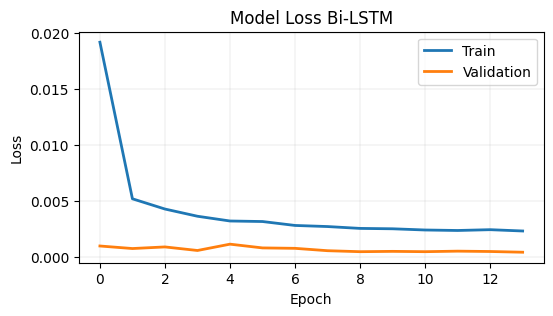

In [79]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_bilstm.history['loss'], linewidth=2)
plt.plot(history_bilstm.history['val_loss'], linewidth=2)
plt.title('Model Loss Bi-LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid(True, linewidth=0.18)
plt.show()

In [80]:
# Windowing pada data testing
test_data = data_sc[-(test_len + 30):, :]  # ambil data testing + 30 hari sebelumnya
x_test = []
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# y_test: ambil nilai Close asli untuk dibandingkan nanti
y_test = df[['Close']].iloc[-test_len:].values


In [81]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [82]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [83]:
# Load bobot model terbaik
model_bilstm.load_weights("/content/model_checkpoints/weights_bilstm_model.weights.h5")


In [84]:
# Melakukan prediksi
y_pred_bilstm = model_bilstm.predict(x_test)
y_pred_bilstm = np.ceil(sc.inverse_transform(y_pred_bilstm))

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step


In [85]:
# Evaluasi menggunakan metrik MSE, RMSE, dan MAE untuk Bi-LSTM
mse_bilstm = round(mean_squared_error(y_test, y_pred_bilstm), 2)
rmse_bilstm = round(np.sqrt(np.mean((y_test - y_pred_bilstm) ** 2)), 2)
mae_bilstm = round(mean_absolute_error(y_test, y_pred_bilstm), 2)

# Cetak hasil evaluasi
print("Evaluasi Model Bi-LSTM")
print(f'MSE  : {mse_bilstm}')
print(f'RMSE : {rmse_bilstm}')
print(f'MAE  : {mae_bilstm}')


Evaluasi Model Bi-LSTM
MSE  : 0.58
RMSE : 0.76
MAE  : 0.57


In [86]:
# Buat DataFrame hasil prediksi Bi-LSTM
data_pred_bilstm = df[-test_len:].copy()
data_pred_bilstm['Prediction'] = y_pred_bilstm

# Tampilkan jumlah total baris
print(f"Jumlah baris prediksi: {len(data_pred_bilstm)}")

# Jika ingin tampilkan seluruh DataFrame
from IPython.display import display
display(data_pred_bilstm)


Jumlah baris prediksi: 156


,Date,Close,High,Low,Open,Volume,Prediction
1413,2024-08-14,9.74,9.97,9.70,9.88,29574700,10.0
1414,2024-08-15,10.09,10.16,9.95,9.96,32307300,10.0
1415,2024-08-16,10.05,10.14,9.97,10.02,35389700,10.0
1416,2024-08-19,10.31,10.38,10.12,10.15,30380100,10.0
1417,2024-08-20,10.29,10.45,10.21,10.31,23537400,10.0
...,...,...,...,...,...,...,...
1564,2025-03-24,11.83,11.90,11.54,11.56,44590200,12.0
1565,2025-03-25,11.51,12.07,11.46,11.95,57417100,12.0
1566,2025-03-26,11.44,11.55,11.30,11.55,46162100,12.0
1567,2025-03-27,11.14,11.35,11.09,11.32,53377900,12.0


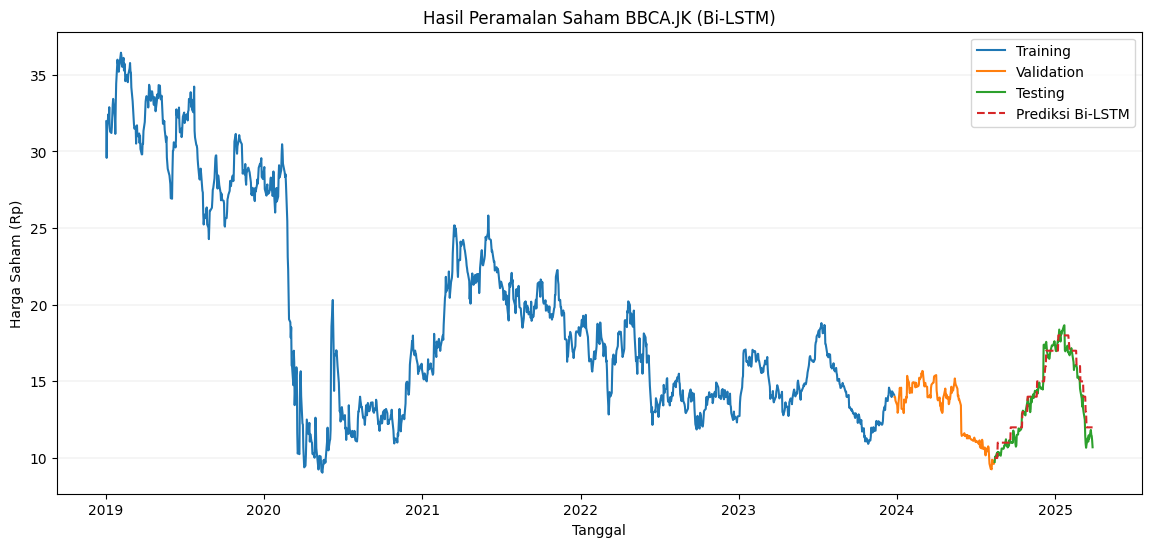

In [87]:
# Visualisasi Prediksi
train = df[:train_len]
valid = df[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham BBCA.JK (Bi-LSTM)')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Close'], label='Testing')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Prediction'], label='Prediksi Bi-LSTM', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

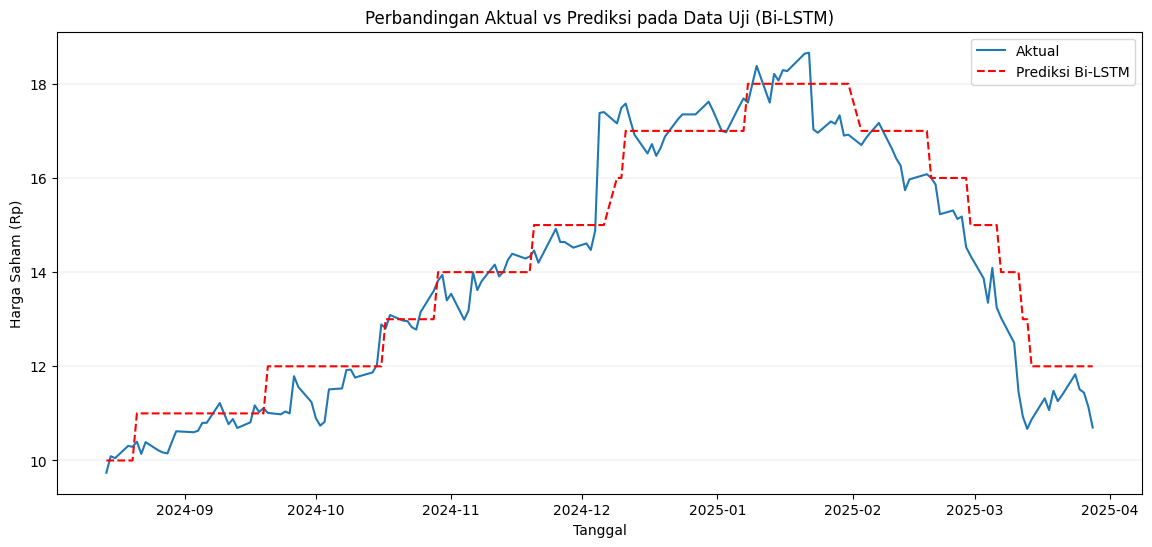

In [88]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Perbandingan Aktual vs Prediksi pada Data Uji (Bi-LSTM)')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Close'], label='Aktual')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Prediction'], label='Prediksi Bi-LSTM', color='red', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━

,Date,Prediction
0,2025-03-29,12.0
1,2025-03-30,12.0
2,2025-03-31,12.0
3,2025-04-01,12.0
4,2025-04-02,12.0
5,2025-04-03,12.0
6,2025-04-04,12.0
7,2025-04-05,12.0
8,2025-04-06,12.0
9,2025-04-07,12.0


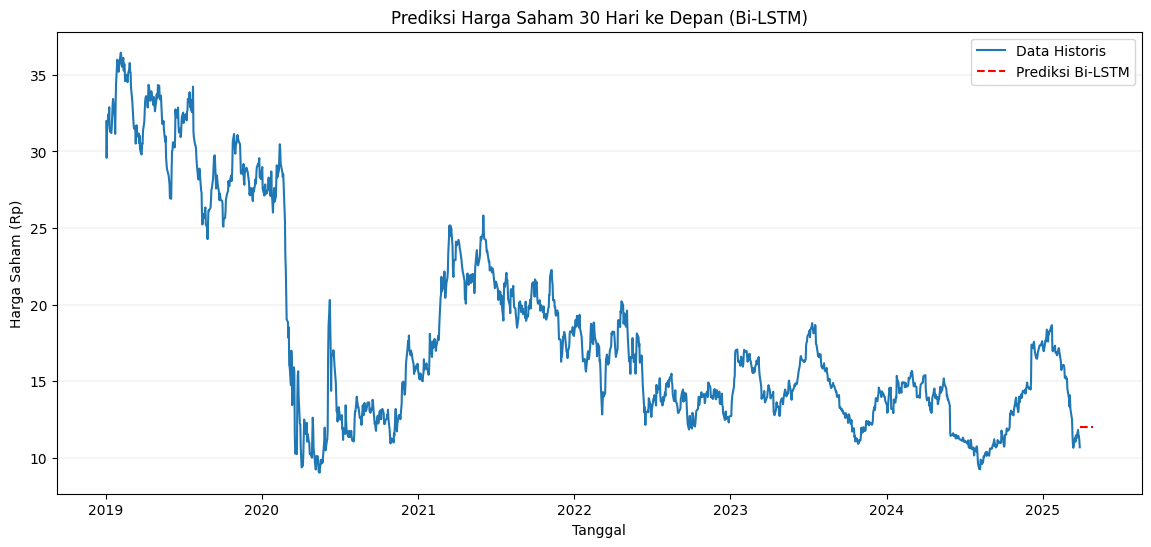

In [89]:
# === PREDIKSI 30 HARI KE DEPAN MENGGUNAKAN BI-LSTM ===
from datetime import timedelta

# Langkah prediksi
future_steps = 30
last_30_days = data_sc[-30:]  # ambil 30 data terakhir dari dataset
future_preds = []

# Format input awal
input_seq = last_30_days.reshape(1, 30, 1)

# Loop prediksi hari ke hari
for _ in range(future_steps):
    next_pred = model_bilstm.predict(input_seq)[0][0]
    future_preds.append(next_pred)

    # Update input_seq dengan prediksi baru
    next_input = np.append(input_seq[0, 1:], [[next_pred]], axis=0)
    input_seq = next_input.reshape(1, 30, 1)

# Invers normalisasi agar kembali ke nilai asli
future_preds_actual = np.ceil(sc.inverse_transform(np.array(future_preds).reshape(-1,1)))

# Buat tanggal untuk 30 hari ke depan
last_date = df['Date'].max()
future_dates = [last_date + timedelta(days=i+1) for i in range(future_steps)]

# DataFrame hasil prediksi
future_df_bilstm = pd.DataFrame({
    'Date': future_dates,
    'Prediction': future_preds_actual.flatten()
})

# Tampilkan hasil prediksi
print("=== Prediksi 30 Hari ke Depan (Bi-LSTM) ===")
display(future_df_bilstm)

# Visualisasi hasil prediksi ke depan
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham 30 Hari ke Depan (Bi-LSTM)')
plt.plot(df['Date'], df['Close'], label='Data Historis')
plt.plot(future_df_bilstm['Date'], future_df_bilstm['Prediction'], label='Prediksi Bi-LSTM', linestyle='--', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()


In [101]:
# Membangun Model Stacked LSTM
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Bidirectional, Input
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

model_stacked_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [102]:
# Callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-4,
    verbose=1,
    restore_best_weights=True
)

checkpoint_path_bigru = 'model_checkpoints/weights_stacked_lstm.weights.h5'
os.makedirs(os.path.dirname(checkpoint_path_bigru), exist_ok=True)

checkpoint_bigru = ModelCheckpoint(
    filepath=checkpoint_path_bigru,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

In [103]:
# Konfigurasi Optimizer dan Loss Function untuk Stacked LSTM
op = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile Model stacked LSTM
model_stacked_lstm.compile(optimizer=op, loss='mean_squared_error')

In [104]:
# Training model
history_stacked_lstm = model_stacked_lstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_bigru, early_stopping]
)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0376
Epoch 1: val_loss improved from inf to 0.00108, saving model to model_checkpoints/weights_stacked_lstm.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.0375 - val_loss: 0.0011
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0058
Epoch 2: val_loss did not improve from 0.00108
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0058 - val_loss: 0.0011
Epoch 3/100
153/154 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0049
Epoch 3: val_loss improved from 0.00108 to 0.00083, saving model to model_checkpoints/weights_stacked_lstm.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0049 - val_loss: 8.3178e-04
Epoch 4/100
153/154 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0053
Epoch 4: val_loss did not improve from 0.00083
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0053 - val_loss: 0.0012
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0044
Epoch 5: val_loss im

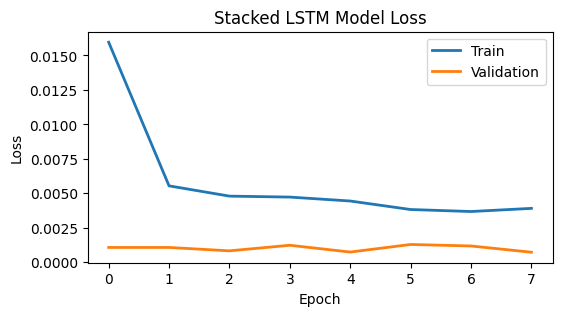

In [105]:
# Menampilkan plot nilai loss untuk Stacked LSTM
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.plot(history_stacked_lstm.history['loss'], linewidth=2)       # Loss pada data training
plt.plot(history_stacked_lstm.history['val_loss'], linewidth=2)   # Loss pada data validasi

plt.title('Stacked LSTM Model Loss')  # Judul yang relevan dengan stacked LSTM
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [106]:
# Windowing pada data testing untuk Stacked LSTM
test_data = data_sc[-(test_len + 30):, :]  # ambil data testing + 30 hari sebelumnya
x_test = []
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [107]:
# Target asli (label)
y_test = df[['Close']].iloc[-test_len:].values

In [108]:
# Load bobot model Stacked LSTM terbaik
model_stacked_lstm.load_weights('/content/model_checkpoints/weights_stacked_lstm.weights.h5')

In [109]:
# Melakukan prediksi dengan model Stacked LSTM
y_pred_stacked_lstm = model_stacked_lstm.predict(x_test)

# Mengembalikan hasil prediksi ke skala asli
y_pred_stacked_lstm = np.ceil(sc.inverse_transform(y_pred_stacked_lstm))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluasi menggunakan metrik MSE, RMSE, dan MAE untuk Stacked LSTM
mse_stacked = round(mean_squared_error(y_test, y_pred_stacked_lstm), 2)
rmse_stacked = round(np.sqrt(np.mean((y_test - y_pred_stacked_lstm) ** 2)), 2)
mae_stacked = round(mean_absolute_error(y_test, y_pred_stacked_lstm), 2)

# Cetak hasil evaluasi
print("Evaluasi Model Stacked LSTM")
print(f'MSE  : {mse_stacked}')
print(f'RMSE : {rmse_stacked}')
print(f'MAE  : {mae_stacked}')


Evaluasi Model Stacked LSTM
MSE  : 1.08
RMSE : 1.04
MAE  : 0.78


In [111]:
# Membuat DataFrame hasil prediksi Stacked LSTM
data_pred_stacked_lstm = data[-test_len:].copy()
data_pred_stacked_lstm['Prediction'] = y_pred_stacked_lstm
data_pred_stacked_lstm

,Date,Close,Prediction
1413,2024-08-14,9.74,11.0
1414,2024-08-15,10.09,11.0
1415,2024-08-16,10.05,11.0
1416,2024-08-19,10.31,11.0
1417,2024-08-20,10.29,11.0
...,...,...,...
1564,2025-03-24,11.83,12.0
1565,2025-03-25,11.51,12.0
1566,2025-03-26,11.44,12.0
1567,2025-03-27,11.14,12.0


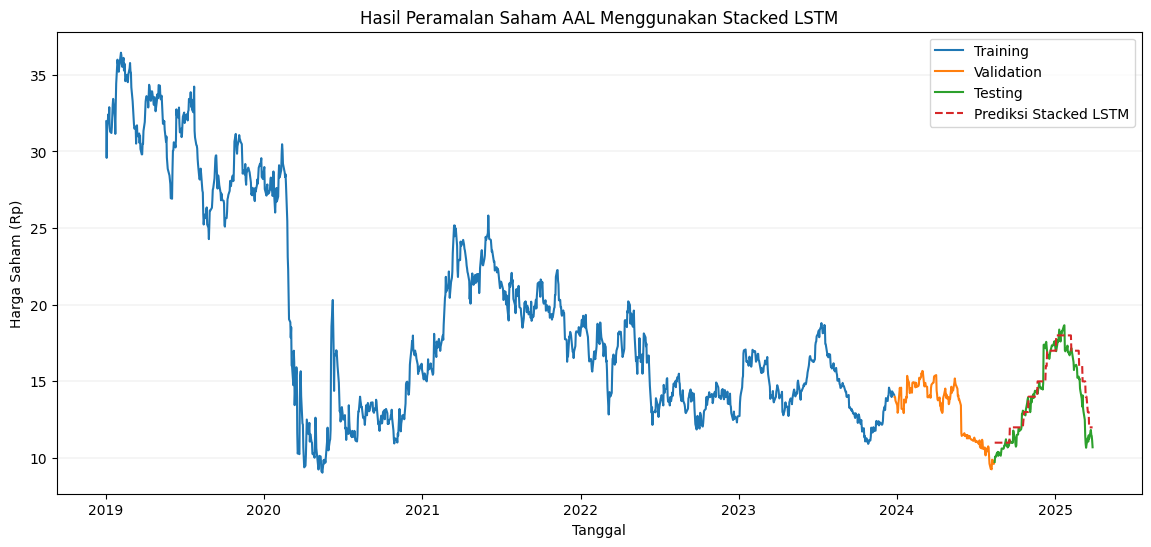

In [113]:
# Visualisasi Hasil Prediksi Saham AAL dengan Stacked LSTM
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham AAL Menggunakan Stacked LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Close'], label='Testing')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Prediction'],
         label='Prediksi Stacked LSTM', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

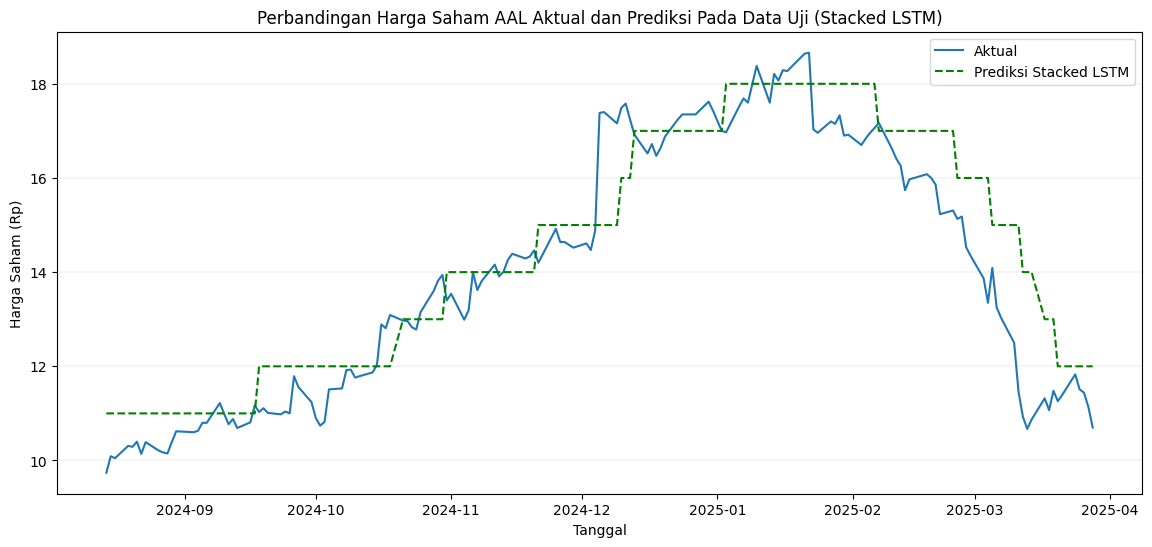

In [114]:
# Visualisasi Prediksi Data Uji Saham AAL dengan Stacked LSTM
plt.figure(figsize=(14,6))
plt.title('Perbandingan Harga Saham AAL Aktual dan Prediksi Pada Data Uji (Stacked LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')

# Plot data aktual dan prediksi Stacked LSTM
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Close'], label='Aktual')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Prediction'],
         label='Prediksi Stacked LSTM', color='green', linestyle='--')

plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [115]:
from datetime import timedelta

# Ambil data terakhir sebagai input prediksi awal
last_input = x_test[-1]  # ambil data terakhir dari test set
future_input = last_input.reshape(1, last_input.shape[0], last_input.shape[1])

# Prediksi 30 hari ke depan dengan model Stacked LSTM
future_preds_stacked = []

for _ in range(30):
    next_pred = model_stacked_lstm.predict(future_input)
    future_preds_stacked.append(next_pred[0])

    # Update input untuk prediksi berikutnya
    future_input = np.append(future_input[:, 1:, :], [[next_pred[0]]], axis=1)

# Invers transform hasil prediksi ke skala asli
future_preds_inv_stacked = sc.inverse_transform(future_preds_stacked)

# Buat tanggal 30 hari ke depan (weekday saja)
last_date = pd.to_datetime(data['Date'].iloc[-1])
future_dates = []
curr_date = last_date + timedelta(days=1)

while len(future_dates) < 30:
    if curr_date.weekday() < 5:  # weekday: Senin-Jumat (0–4)
        future_dates.append(curr_date)
    curr_date += timedelta(days=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━

In [116]:
# DataFrame hasil prediksi Stacked LSTM
pred_30_stacked = pd.DataFrame({
    'Date': future_dates,
    'Prediction': np.ceil(future_preds_inv_stacked.flatten())
})

# Tampilkan hasil
pred_30_stacked.head()

,Date,Prediction
0,2025-03-31,12.0
1,2025-04-01,12.0
2,2025-04-02,12.0
3,2025-04-03,12.0
4,2025-04-04,12.0


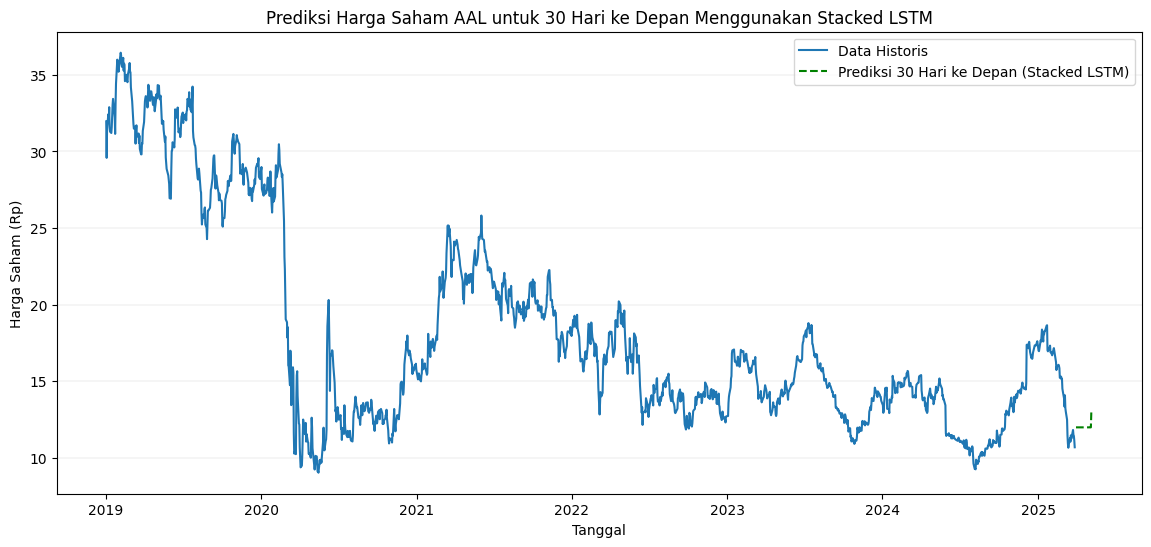

In [117]:
# Prediksi Harga Saham AAL untuk 30 Hari ke Depan Stacked LSTM
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham AAL untuk 30 Hari ke Depan Menggunakan Stacked LSTM')
plt.plot(data['Date'], data['Close'], label='Data Historis')

# Garis prediksi 30 hari ke depan
plt.plot(pred_30_stacked['Date'], pred_30_stacked['Prediction'],
         label='Prediksi 30 Hari ke Depan (Stacked LSTM)', linestyle='--',
    color='green')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [118]:
# Evaluasi Metrik untuk LSTM
print("=== Evaluasi Model LSTM ===")
print(f'MSE : {mse_lstm}')
print(f'RMSE : {rmse_lstm}')
print(f'MAE : {mae_lstm}')

# Evaluasi Metrik untuk Bi-LSTM
print("=== Evaluasi Model Bi-LSTM ===")
print(f'MSE : {mse_bilstm}')
print(f'RMSE : {rmse_bilstm}')
print(f'MAE : {mae_bilstm}')

# Evaluasi Metrik untuk Stacked LSTM
print("=== Evaluasi Model Stacked LSTM ===")
print(f'MSE : {mse_stacked}')
print(f'RMSE : {rmse_stacked}')
print(f'MAE : {mae_stacked}')

=== Evaluasi Model LSTM ===
MSE : 0.95
RMSE : 0.97
MAE : 0.74
=== Evaluasi Model Bi-LSTM ===
MSE : 0.58
RMSE : 0.76
MAE : 0.57
=== Evaluasi Model Stacked LSTM ===
MSE : 1.08
RMSE : 1.04
MAE : 0.78


In [122]:
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Ensure checkpoint variables are accessible or redefine them if necessary
# Based on the notebook context, they should be available from previous cells.
# If not, you would need to re-define them here:
# early_stopping = EarlyStopping(...)
# checkpoint_lstm = ModelCheckpoint(...)
# checkpoint_bilstm = ModelCheckpoint(...)
# checkpoint_bigru = ModelCheckpoint(...) # Used for Stacked LSTM

# Waktu training untuk LSTM
start_lstm = time.time()
history_lstm = model_lstm.fit(x_train, y_train, batch_size=8, epochs=100,
                              validation_data=(x_val, y_val), callbacks=[checkpoint_lstm, early_stopping_lstm])
end_lstm = time.time()
print(f"Training Time for LSTM: {end_lstm - start_lstm:.2f} seconds")

# Waktu training untuk Bi-LSTM
start_bilstm = time.time()
history_bilstm = model_bilstm.fit(x_train, y_train, batch_size=8, epochs=100,
                                    validation_data=(x_val, y_val), callbacks=[checkpoint_bilstm, early_stopping]) # Use checkpoint_bilstm
end_bilstm = time.time()
print(f"Training Time for Bi-LSTM: {end_bilstm - start_bilstm:.2f} seconds")

# Waktu training untuk Stacked LSTM
start_stacked = time.time()
history_stacked = model_stacked_lstm.fit(x_train, y_train, batch_size=8, epochs=100,
                                         validation_data=(x_val, y_val), callbacks=[checkpoint_bigru, early_stopping]) # Use checkpoint_bigru
end_stacked = time.time()
print(f"Training Time for Stacked LSTM: {end_stacked - start_stacked:.2f} seconds")

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0029
Epoch 1: val_loss improved from 0.00068 to 0.00064, saving model to model_checkpoints/weights_lstm_model.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0029 - val_loss: 6.3923e-04
Epoch 2/100
153/154 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0030
Epoch 2: val_loss did not improve from 0.00064
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.0030 - val_loss: 6.7838e-04
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0030
Epoch 3: val_loss did not improve from 0.00064
154/154 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0030 - val_loss: 7.4644e-04
Epoch 4/100
153/154 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0030
Epoch 4: val_loss did not improve from 0.00064
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.0030 - val_loss: 7.1366e-04
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0031
Epoch 5: val_loss improved from 0.00064 to 0.00058, saving model to model_chec

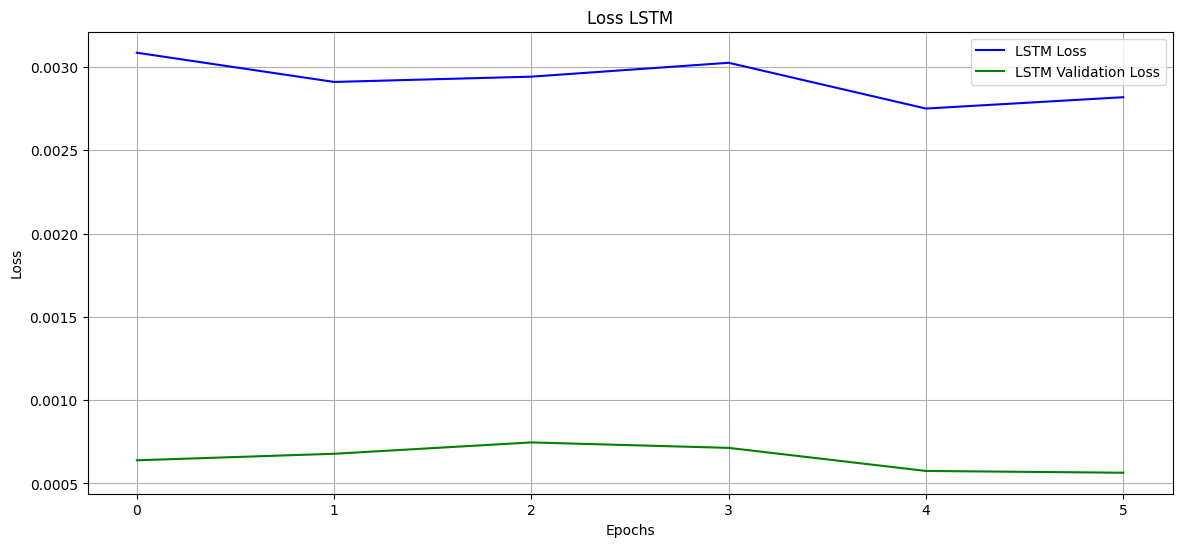

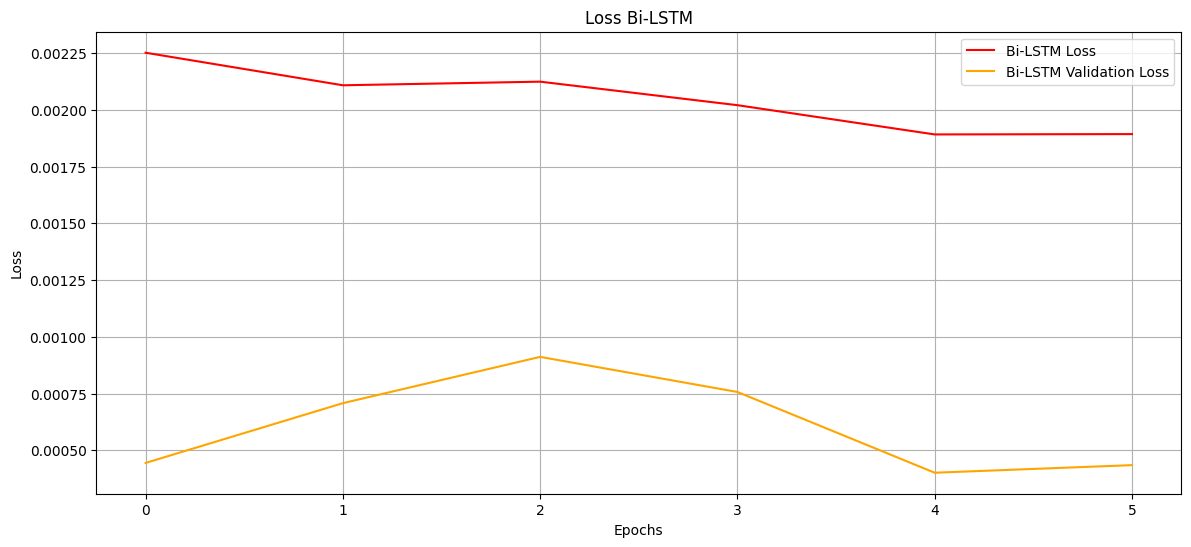

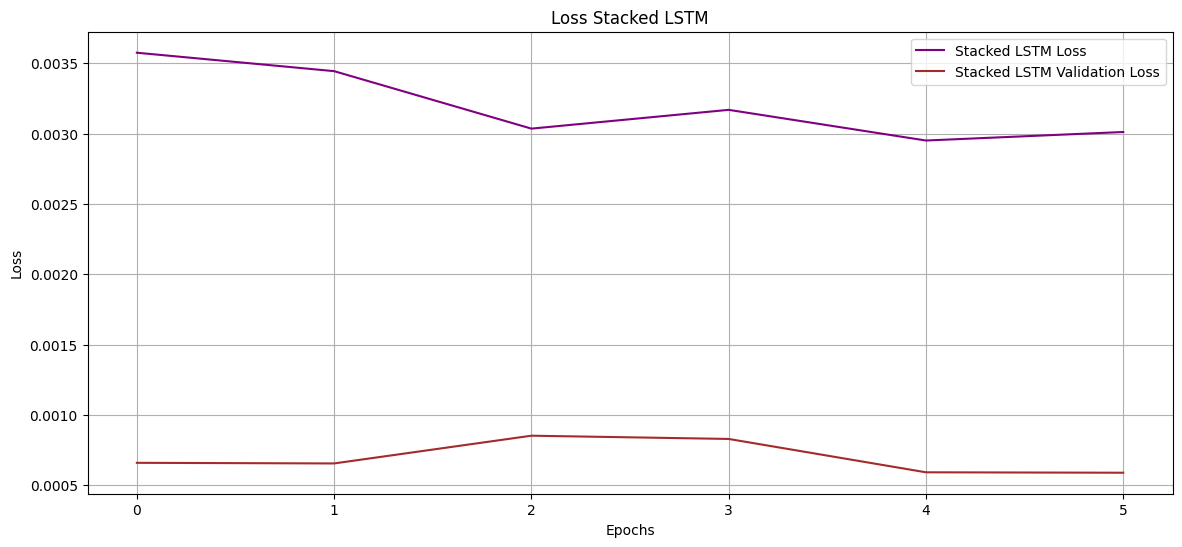

In [123]:
# Grafik loss untuk LSTM
plt.figure(figsize=(14,6))
plt.plot(history_lstm.history['loss'], label='LSTM Loss', color='blue')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss', color='green')
plt.title('Loss LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Grafik loss untuk Bi-LSTM
plt.figure(figsize=(14,6))
plt.plot(history_bilstm.history['loss'], label='Bi-LSTM Loss', color='red')
plt.plot(history_bilstm.history['val_loss'], label='Bi-LSTM Validation Loss', color='orange')
plt.title('Loss Bi-LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Grafik loss untuk Stacked LSTM
plt.figure(figsize=(14,6))
plt.plot(history_stacked.history['loss'], label='Stacked LSTM Loss', color='purple')
plt.plot(history_stacked.history['val_loss'], label='Stacked LSTM Validation Loss', color='brown')
plt.title('Loss Stacked LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

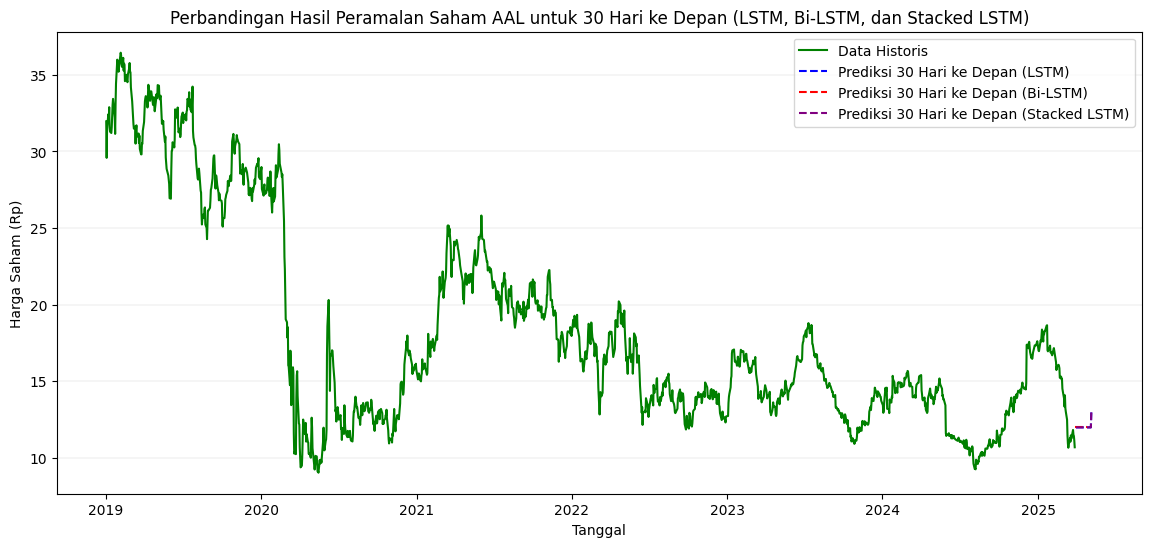

In [124]:
# Visualisasi Perbandingan Hasil Prediksi Saham AAL untuk 30 Hari ke Depan (LSTM, Bi-LSTM, dan Stacked LSTM)
plt.figure(figsize=(14,6))
plt.title('Perbandingan Hasil Peramalan Saham AAL untuk 30 Hari ke Depan (LSTM, Bi-LSTM, dan Stacked LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')

# Plotkan harga saham historis
plt.plot(data['Date'], data['Close'], label='Data Historis', color='green')

# Plotkan prediksi menggunakan LSTM
plt.plot(pred_30_lstm['Date'], pred_30_lstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (LSTM)', linestyle='--', color='blue')

# Plotkan prediksi menggunakan Bi-LSTM
plt.plot(future_df_bilstm['Date'], future_df_bilstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (Bi-LSTM)', linestyle='--', color='red')

# Plotkan prediksi menggunakan Stacked LSTM
plt.plot(pred_30_stacked['Date'], pred_30_stacked['Prediction'],
         label='Prediksi 30 Hari ke Depan (Stacked LSTM)', linestyle='--', color='purple')

# Menambahkan legend dan grid
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()